In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
import pickle

In [260]:
df = pd.read_csv(r"D:\ML Datasets\Project Dataset\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [261]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [262]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [264]:
df.drop(columns='customerID', inplace =True)

In [265]:
# printing unique terms 
for col in df.columns:
    print(col, df[col].unique())
    print("-")

gender ['Female' 'Male']
-
SeniorCitizen [0 1]
-
Partner ['Yes' 'No']
-
Dependents ['No' 'Yes']
-
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
-
PhoneService ['No' 'Yes']
-
MultipleLines ['No phone service' 'No' 'Yes']
-
InternetService ['DSL' 'Fiber optic' 'No']
-
OnlineSecurity ['No' 'Yes' 'No internet service']
-
OnlineBackup ['Yes' 'No' 'No internet service']
-
DeviceProtection ['No' 'Yes' 'No internet service']
-
TechSupport ['No' 'Yes' 'No internet service']
-
StreamingTV ['No' 'Yes' 'No internet service']
-
StreamingMovies ['No' 'Yes' 'No internet service']
-
Contract ['Month-to-month' 'One year' 'Two year']
-
PaperlessBilling ['Yes' 'No']
-
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
-
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  

In [266]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [267]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0.0")

In [268]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [270]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [271]:
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

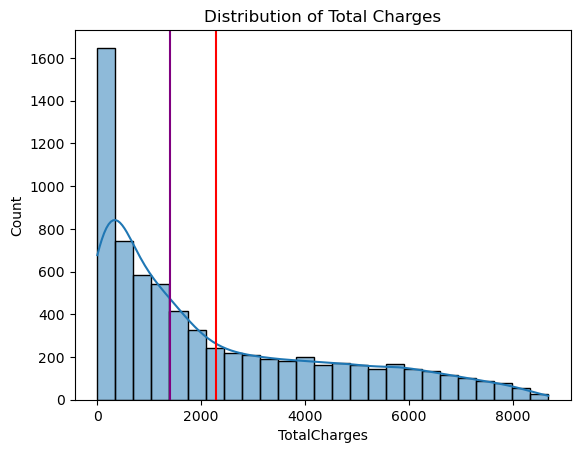

<Figure size 400x200 with 0 Axes>

In [272]:
sns.histplot(df['TotalCharges'], kde =True)
plt.title('Distribution of Total Charges')
col_mean = df['TotalCharges'].mean()
col_median = df['TotalCharges'].median()
plt.axvline(col_mean, color = 'Red', label = 'Mean')
plt.axvline(col_median, color = 'Purple', label = 'Median')
plt.figure(figsize=(4,2))
plt.show()

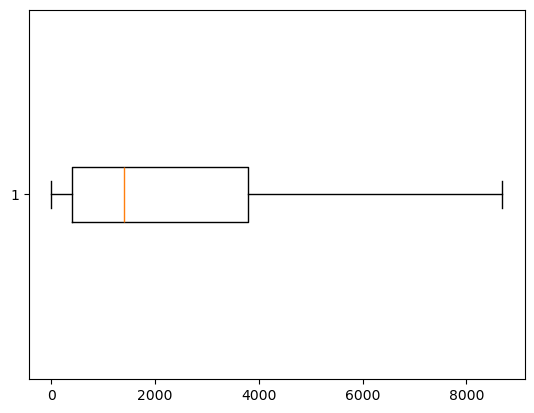

In [273]:

plt.boxplot(df['TotalCharges'], orientation= 'horizontal')

plt.show()

In [274]:
# Now convert the churn to numeric value
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


C:\Users\Ayush Keshri\AppData\Local\Temp\ipykernel_83456\3423608310.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [275]:
label_encode = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encode.fit_transform(df[col])

In [276]:
# Now spliting into input and output
X = df.drop('Churn', axis =1)
y = df['Churn']

In [277]:
print(Y.value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=40, stratify=y)

In [279]:
smote = SMOTE(random_state=42)

In [280]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [281]:
scalar =StandardScaler()

In [282]:
X_train_smote = scalar.fit_transform(X_train_smote)

In [283]:
X_test = scalar.fit_transform(X_test)

In [284]:
# Model Evaluation
lr =LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [285]:
y_pred = lr.predict(X_test)

In [286]:
accuracy_score(y_test, y_pred)*100

69.83676366217175

In [287]:
# Perform Decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

In [288]:
y_pred_dt = dt.predict(X_test)

In [289]:
accuracy_score(y_test, y_pred_dt)*100

71.11426543647977

In [290]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32),random_state=40)

In [291]:
mlp.fit(X_train_smote, y_train_smote)

C:\Users\Ayush Keshri\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), random_state=40)

In [292]:
y_pred_mlp = mlp.predict(X_test)

In [296]:
accuracy_score(y_test, y_pred_mlp)*100

64.08800567778566